### 1.1
What is the value of $\sqrt{2}^{\sqrt{2}^{{\sqrt{2}^{...}}}}$?

Below is the solution using Python.

In [1]:
import numpy as np
n=np.sqrt(2)
for i in range(10000):
    n=np.sqrt(2)**n
print(n)

2.0


### 1.2
What is the value of ${x}^{{x}^{{{x}^{...}}}}$=2?


Answer:${x}^{{x}^{{{x}^{...}}}}=y$,  ${x}^{y}=y$,  $y^{1/y}=x$,  $x=\sqrt{2}$

### 3.1
You have a bag with two coins. One will come up heads 40% of the time, and the other will come up heads 60%. You pick a coin randomly, flip it and get a head. What is the probability it will be heads on the next flip?

In [86]:
import math
import random as rnd
head1=0
head2=0
#for n in range(0,1000):
#    coin1=math.floor(rnd.random()/0.6)
#    head += coin1
firstFlipIsAHeadCounter = 0
secondFlipIsAHeadCounter = 0
for trialCtr in range(0,1000):
    if rnd.random() < 0.5: #reach into bag, and grab either coin
        probTail = 0.6# head 40% of the time
    else:
        probTail = 0.4# head 60% of the time
    coin1 = headsOrTails(probTail)
    if coin1>0.5:
        head1 += coin1
        coin2 = headsOrTails(probTail)
        head2 += coin2
print (float(head2)/float(head1),head1,head2)

def headsOrTails(probTail):
    if rnd.random()< probTail:
        return 0
    return 1 #head


(0.5219885277246654, 523, 273)


### 3.1 Objected-oriented version

Here we solve the same problem, but introducing objects to python.

A simplistic approach to OO design is to identify the nouns in the problem description, and consider those to be potential "classes". A class is a templete, sort of like a cookie cutter for stampling out identical objects ready for  use.

In this problem, we see **coin** and **purse** in the problem description. So let's make them into class.

The "method" of a class represent the action we expect of the objects created from the class.


In [62]:
import random as rnd
import numpy as np
class Coin(object): #we capitalize the names of classes. 
    #almost always define a constructor, so  that we can 
    #create instances(objects)of Coins
    def __init__(self,probHeads):
        self.probHeads = probHeads
    
    def flipIsHead(self):
        return np.random.random() < self.probHeads
    
    def nextNFlipsAreHeads(self,n):
        for i in range(n):
            if not self.flipIsHead():
                return False
        return True
            
class CoinBag(object):
    def __init__(self):
        self.coins = []
        
    def addCoin(self, coin):
        self.coins.append(coin)
    
    def pickRandomCoin(self):
        return np.random.choice(self.coins)

cb = CoinBag()
cb.addCoin(Coin(0.6))
cb.addCoin(Coin(0.4))

#print cb.pickRandomCoin().probHeads
firstFlipIsAHeadCounter = 0
secondFlipIsAHeadCounter = 0
for trialCtr in range(0,1000):
    randomcoin= cb.pickRandomCoin()
    if randomcoin.flipIsHead():
        firstFlipIsAHeadCounter +=1
        if randomcoin.flipIsHead():
            secondFlipIsAHeadCounter +=1
print (float(secondFlipIsAHeadCounter)/float(firstFlipIsAHeadCounter))






0.5


## 3.1
In front of you is a jar of 1000 coins. One of the coins has two heads, and the rest are fair coins. You choose a coin at random, and flip it ten times, getting all heads. What is the probability it is one of the fair coins?

In [64]:
cb= CoinBag()
cb.addCoin(Coin(1))
#for i in range(999):
#    cb.addCoin(Coin(0.5))
[cb.addCoin(Coin(0.5)) for n in range(0,999)]

for i in range(10000):
    randomcoin= cb.pickRandomCoin()
    if randomcoin.probHeads==1:
        count1 +=1
    else:
        if randomcoin.nextNFlipsAreHeads(10):
            count2 +=1
            
print (float(count1)/(count1+count2),count1,count2)   
    

(0.4993788819875776, 402, 403)


### Monte Hall Problem

You are a conteseant on a game show. You have 3 doors in front of you. Behind two of the doors are goats. Unattractive goats. Behind the other door is a brand new Tesla. The game show host asks you to choose a door. After you do, he opens one of the remaining doors, and there stands a goat. The game show that host asks you if you'd like yo switch doors. What do you do?

### 3.5
Starting at one vertex of a cube, and moving randomly from vertex to adjacent vertices, what is the expected number of moves until you reach the  vertex opposite from your starting point?

In [36]:
#WRONG ANSWER
import random as rnd
import numpy as np
step=np.zeros([1,1])
sum=0
j=0
for i in range(1000000000):
    if rnd.random()< 0.5:
        go=-1
    else:
        go=1
    sum=sum+go;
    if sum==3:
        step=np.append(step,i-j)
        j=i
        sum=0
np.mean(step)

24619.771660649818

start from A, second step B, third step C, destination D.
transaction grap. 
Take first step to B. Two moves transaction grap only have B and D.
Then we could calculate the expected exit moves(10).

### 3.8
You have a spinner that generates random numbers that are uniform between 0 and 1. You sum the spins until the sum is greater than one. What is the expected number of spins?

2.65
Populating the interactive namespace from numpy and matplotlib


(array([ 0.69333333,  0.42666667,  0.17333333,  0.04      ]),
 array([ 2.  ,  2.75,  3.5 ,  4.25,  5.  ]),
 <a list of 4 Patch objects>)

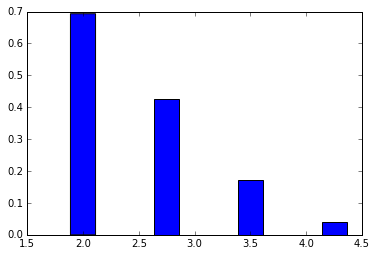

In [3]:
import numpy as np
class Spinner(object):
    def __init__(self):
        self.total = 0
        self.spincountr = 0
    
    def spin(self):
        self.total +=np.random.random()
        self.spincountr += 1
    
    def reset(self):
        self.total = 0
        self.spincountr = 0
    
    def spinUnitFrenaterThanOne(self):
        while self.total < 1:
            self.spin()
        answer=self.spincountr
        self.reset()
        return answer
spinner = Spinner()
n=100
num=0
for i in range(n):
    num +=spinner.spinUnitFrenaterThanOne()
print (float(num)/n)
trails = [spinner.spinUnitFrenaterThanOne() for n in range(n)] 
import matplotlib.pyplot as plt
numbins=max(trails)-min(trails)+1
%pylab inline
plt.hist(trails,bins=numbins,normed=True, align='left',rwidth=0.3)

In [84]:
import numpy as np
sum=0
j=0
step=np.zeros([1,1])
for i in range(10000):
    sum=sum+rnd.random()
    if sum > 1:
        step=np.append(step,i-j)
        j=i
        sum=0
np.mean(step)

2.7114184974233795

### 4.4
You have a basket of $n$ assets. The asset returns are multivariate normal with zero mean. Correlation between any pair of assets is 1/2. What is the probability that $k$ of the assets will have positive return?

### 3.10
A stick is broken randomly into 3 pieces. What is the probability of the pieces being able to form a triangle?

In [11]:
import random as rnd
count=0
n=100000
for i in range(n):
    a=rnd.random()
    b=rnd.random()*(1-a)
    c=1-a-b
    if a+b>c and b+c>a and c+a>b:
        count += 1
float(count)/n


0.19197

### 5.10
Suppose there are 36 students in the QFRM program, each assigned a unique integer from 1 to 36. Thirty-six quarters are laid out on a table in a row, heads up. Each student goes to the table, and if they are assigned the number $n$, they turn over the $n$th coin, the $2n$th coin, and so on. So, for example, the student who is assigned 15 will turn over the 15th and 30th coins. When everyone is done, how many tails are showing?

### 3.11
A stick is broken randomly into two pieces. The larger piece is then broken randomly into two pieces. What is the probability of the pieces being able to form a triangle?

In [70]:
import random as rnd
count=0
n=100000
for i in range(n):
    a=rnd.random()
    a=min(a,1-a)
    b=rnd.random()*(1-a)
    c=1-a-b
    if a+b>c and b+c>a and c+a>b:
        count += 1
float(count)/n

0.38726